# Introduction
This week we will look at some unsupervised clustering algorithms. In this worksheet, we will start off by implementing $k$-means from scratch. We go on to look at using elbow plots to select a good value of $k$.

We go on to complare the behaviour of k-means with hierarchical clustering and Gaussian mixture models.

NB: if you find implementing the $k$-means algorithm form scratch challenging, **don't worry**! Have a go, but the rest of the worksheet is not dependent on doing this, so you can skip that question and come back to it when you finish the rest of the worksheet.

# K-means clustering
In the lecture, we saw that k-means is an unsupervised clustering algorithm. Recall that the algorithm runs as follows:

Given a set of datapoints drawn from $\Omega=\mathbb{R}^n$:

1. Randomly partition the set of datapoints into $k$ sets.
2. For each set $P$ calculate its mean vector:
$$
\hat{x}_P=\left( \frac{\sum_{\vec{x} \in P} x_1}{|P|}, \ldots,\frac{\sum_{\vec{x} \in P} x_i}{|P|} \ldots, \frac{\sum_{\vec{x} \in P} x_n}{|P|}  \right)
$$
3. For each datapoint evaluate the squared Euclidean distance from each of the mean vectors e.g. $||\vec{x}-\hat{x}_P ||^2$. Reallocate the datapoint to the partition set the mean of which it is closest to.
4. If the partition sets remain unchanged then stop.  Else go to 2.


## Implementing $k$-means

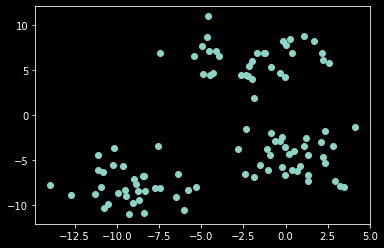

In [170]:
# The following code creates some artificial data and plots it
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

X, y = make_blobs(centers=3,n_samples=100, cluster_std=2, random_state=100)
fig, ax = plt.subplots()
ax.scatter(X[:,0], X[:,1])

Implement a function `kmeans` that takes a value $k$ and the data $X$, clusters the data, and returns the centroids and the labels of the data

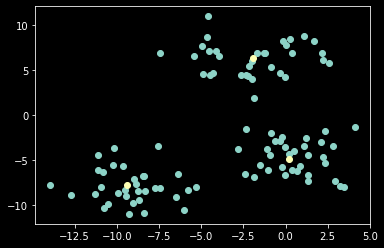

In [171]:
from numpy.random import default_rng
def kmeans(k, X):    
    # randomly assign labels to the data
    rng = default_rng()
    labels = np.array([i%k for i in range(len(X))]) 
    new_labels = np.ones(len(X))
    # set up a while loop that will run until the data labels no longer change
    while True:
        # Calculate the centroids of the data
        centroids = []
        for ki in range(k):
            kix = X[labels==ki]
            centroid_ki = np.mean(kix, axis=0)
            centroids.append(centroid_ki)
        # For each datapoint:
        for i, x in enumerate(X):
            #Calculate the squared Euclidean distance to each centroid
            dis_to_center = np.array([np.linalg.norm(x-a)**2 for a in centroids])
            # Assign new labels based on distance to the centroid
            min_dis =  min(dis_to_center)
            for index, dis in enumerate(dis_to_center):
                if (min_dis == dis):
                    new_labels[i] = index
        # If all the new labels are equal to the old labels, 
        # break out of the while loop
        
        if ((new_labels == labels).all()):
            break
        # Assign the values of the new labels to the variable labels
        ##TODO##
        labels = new_labels        
    # return the centres and the labels.
    return np.array(centroids), labels

# Plot the centroids on the data. Are they as you would expect?
centres, labels = kmeans(3, X)
ax.scatter(centres[:,0],centres[:,1])
fig

## Using the $k$-means function from scikit-learn
Scikit-learn has $k$-means built in. We import it using the command `from sklearn.cluster import KMeans`. Look at the documentation for KMeans (https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#). The KMeans estimator has 4 attributes. What are they?

The attributes are:
1. 
2. 
3. 
4.

Which attribute would you use if you wanted to look at the labels assigned to the datapoints? What if you wanted to look at the centroids? What would you use the attribute `inertia_` for?

### Generating elbow plots
We will run $k$ means over our toy dataset for multiple values of $k$ and generate an elbow plot. To do this we can use the attribute `inertia_`. This attribute measures the within-cluster sum of squares, or the variance of each cluster, and the $k$ means algorithm works to minimize this quantity. The within-cluster sum of squares is defined as:
$$\sum_{j=1}^k\sum_{x \in P_j}||x - \mu_j||^2$$
To generate the elbow plot, we run $k$ means for values of $k$ from 1 to 10, and plot the inertia at each point. If there is a clear 'elbow' in the plot, then this gives us the optimal value of $k$. Do you see a clear 'elbow' in the plot? If so, what is the optimal value of $k$?
    

Text(0.5, 1.0, 'The elbow method showing the optimal k')

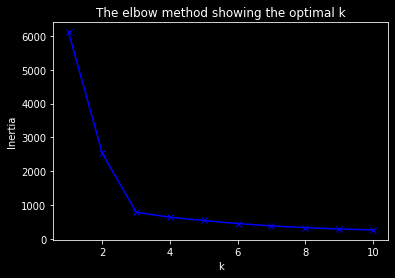

In [172]:
# Import KMeans from sklearn.cluster
from sklearn.cluster import KMeans
K = 10
# Optional: write your own function to calculate the inertia
# (otherwise you can just use the attribute inertia_)


def inertia(X, labels, centroids):
    sum_dis = []
    for index, centroid in enumerate(centroids):
        data_within_cluster = X[labels == index]
        dis_to_centroid = np.array(
            [np.linalg.norm(data_within_cluster-centroid)**2])
        sum_dis.append(np.sum(dis_to_centroid))
    return np.sum(sum_dis)


# Set up a variable to store the inertias
inertias = []
# Loop over values of k from 1 to 10
for k in range(1, K+1):
    # Instantiate the KMeans class with k clusters
    kmeans = KMeans(n_clusters=k, random_state=1)
    # Fit the model to the data
    kmeans.fit(X)
    # Store the value of the inertia for this value of k
    inertias.append(inertia(X, kmeans.labels_, kmeans.cluster_centers_))
    # inertias.append(kmeans.inertia_)

# Plot the elbow
plt.figure()
plt.plot(range(1, K+1), inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The elbow method showing the optimal k')


# Clustering the iris dataset
The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in 1936. The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). There are four features corresponding to the length and the width of the sepals and petals, in centimetres. Typically, the Iris data set is used as a classification problem, but by considering only the 4-D input feature space we can also apply clustering algorithms to it.

In [173]:
# Import the iris dataset, and save the data into a variable X 
# (take a look at the documentation here: 
# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html)
##TODO##
from sklearn.datasets import load_iris
X = load_iris().data
X.shape[1]

4

Let's begin by assuming that since there are 3 types of iris, then there may be 3 clusters. Instantiate a $k$-means classifier with 3 clusters, and fit it to the data. Print out the centroids. You can visualise the resulting clusters by generating scatter plots projected on 2 dimensions. Try generating scatter plots for various combinations of features.

**Extra question** Generate one large plot with subplots for each combination of features.

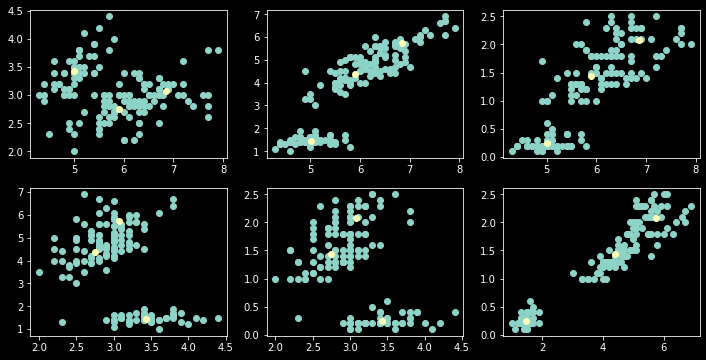

In [174]:
kmeans = KMeans(n_clusters=3, random_state=0)
# Fit the iris dataset
kmeans.fit(X)
cluster_centers = kmeans.cluster_centers_
# Make a scatter plot of the data on the first two axes
# Plot all combinations of data in one large plot with subplots for each combination of features
fig, ax= plt.subplots(2,3, figsize=(12, 6))
ax[0][0].scatter(X[:, 0], X[:, 1])
ax[0][1].scatter(X[:, 0], X[:, 2])
ax[0][2].scatter(X[:, 0], X[:, 3])
ax[1][0].scatter(X[:, 1], X[:, 2])
ax[1][1].scatter(X[:, 1], X[:, 3])
ax[1][2].scatter(X[:, 2], X[:, 3])
ax[0][0].scatter(cluster_centers[:, 0], cluster_centers[:, 1])
ax[0][1].scatter(cluster_centers[:, 0], cluster_centers[:, 2])
ax[0][2].scatter(cluster_centers[:, 0], cluster_centers[:, 3])
ax[1][0].scatter(cluster_centers[:, 1], cluster_centers[:, 2])
ax[1][1].scatter(cluster_centers[:, 1], cluster_centers[:, 3])
ax[1][2].scatter(cluster_centers[:, 2], cluster_centers[:, 3])
plt.show()


Generate an elbow plot for this data set. To what extent does this elbow plot support the assumption that there are three clusters present in the data?

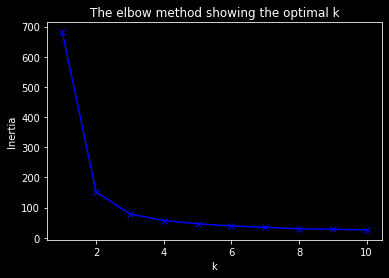

In [175]:
# Generate an elbow plot for this dataset
k_max = 10
inertias = []
for k in range(1,k_max+1):
    kmeans2 = KMeans(n_clusters=k,random_state=1)
    kmeans2.fit(X)
    inertias.append(kmeans2.inertia_)
# Plot the elbow
plt.figure()
plt.plot(range(1, k_max+1), inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The elbow method showing the optimal k')
plt.show()

# Hierarchical clustering
In this question we investigate the use of hierarchical clustering on the Iris data set. SciPy (pronounced 'Sigh Pie') is a Python-based ecosystem of open-source software for mathematics, science, and engineering. We start by importing packages `dendrogram` and `linkage`.



In [176]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering


The following will generate a dendogram for the iris data set:

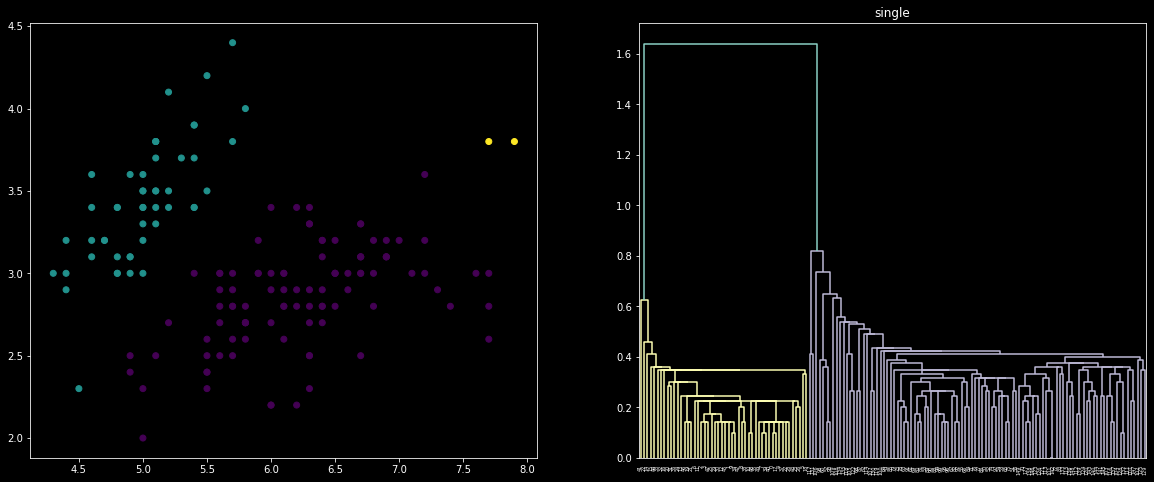

In [177]:
def plot_agglo(X, link):
    colors = ['b','g','r']
    linked = linkage(X, link)
    labelList = range(len(X))
    fig, (ax1,ax2)= plt.subplots(1,2, figsize=(20, 8))
    if (link == "centroid"):
        link = "ward"
        print(link)
    agg2 = AgglomerativeClustering(n_clusters=3,linkage = link).fit(X)
    labels = agg2.labels_
    ax1.scatter(X[:,0],X[:,1], c = labels)
    dendrogram(linked,labels=labelList)   
    plt.title(link)
    plt.show()

plot_agglo(X, link="single")

Recall from the lectures that there are a number of ways of measuring the distance between clusters. For example:
* Minimum distance: $d(S,T) = \min\{d(x,y) : x \in S,y \in T\} $
* Average distance: $d(S,T) = \frac{1}{|S||T|} \sum_{(x, y)} d(x, y)$
* Maximum distance: $d(S,T) = \max\{d(x,y) : x \in S,y \in T\} $
* Centroid distance: $ d(S,T) = d(\frac{\sum_{x\in S} x}{|S|} \frac{\sum_{y\in T} y}{|T|})$

The parameter `'single'` in linkage refers to minimum distance. This can be change to `'average'` for average distance, `'complete'` for maximum distance and `'centroid'` for centroid distance. Generate the dendogram for each of these cases. Comment on which metrics are most consistent with the assumption of 3 clusters in the iris data set.

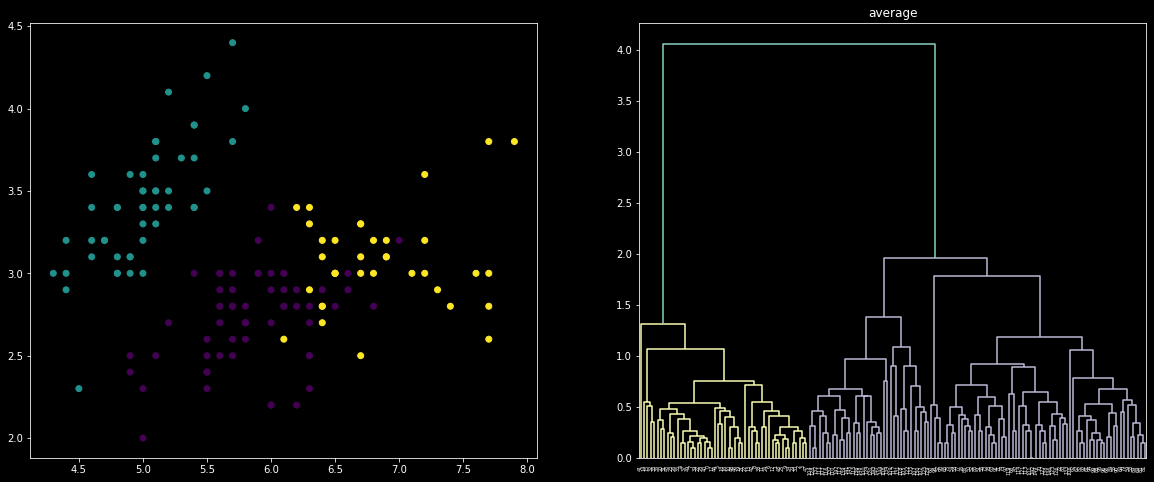

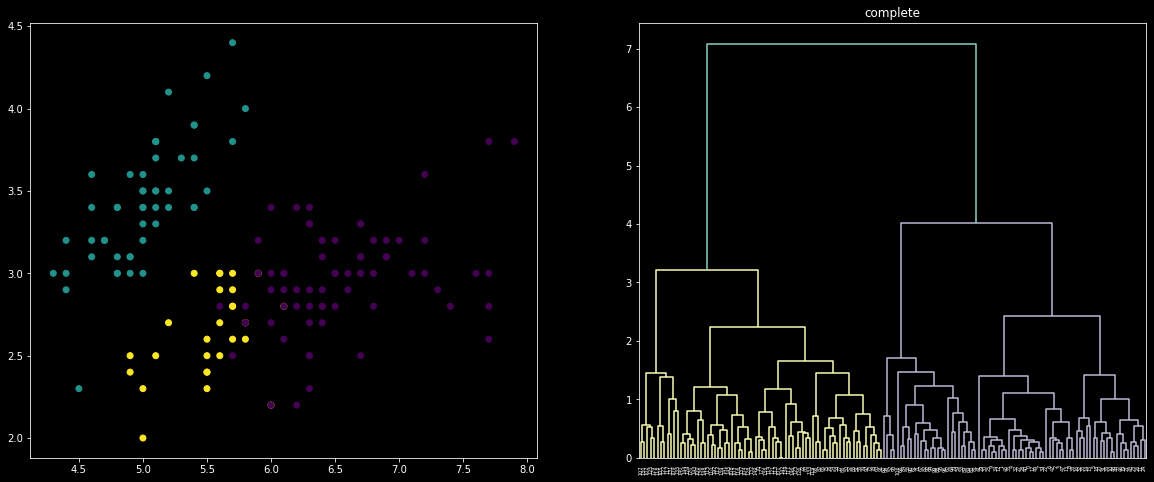

ward


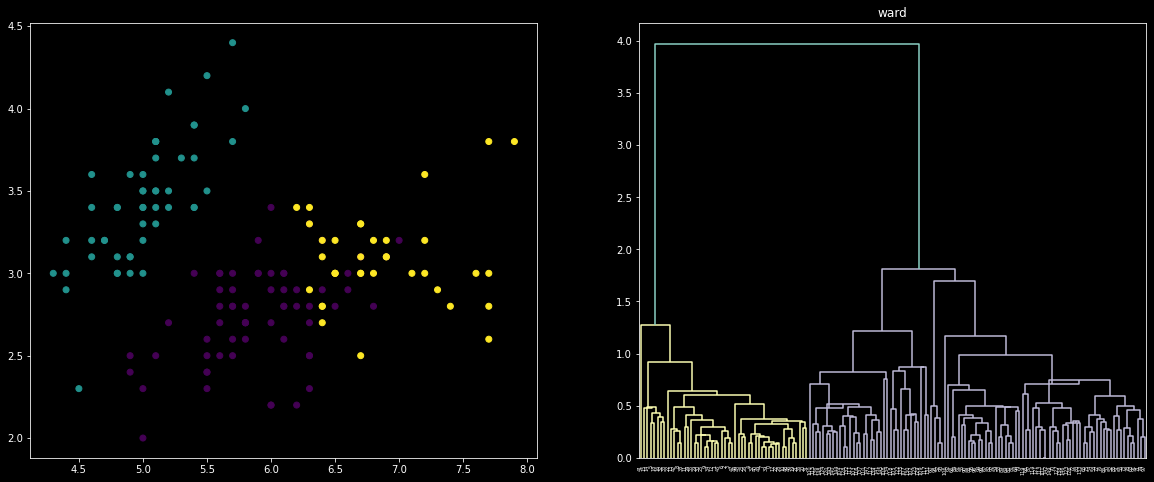

In [178]:
# Generate dendrograms for each distance metric
plot_agglo(X, link="average")
plot_agglo(X, link="complete")
plot_agglo(X, link = "centroid")


The metrics most consistent with the assumption of 3 clusters are: complete

# Gaussian Mixture models
In this question we investigate the use of Gaussian clustering on the Iris data set.

In [179]:
from sklearn.mixture import GaussianMixture as GMM
gmm = GMM(n_components=3)
gmm.fit(X)

GaussianMixture(n_components=3)

We can extract the parameters for the learnt Gaussian distributions as follows:

In [180]:
print(gmm.means_)
print(gmm.covariances_)

[[6.54632887 2.94943079 5.4834877  1.98716063]
 [5.006      3.428      1.462      0.246     ]
 [5.91697517 2.77803998 4.20523542 1.29841561]]
[[[0.38741443 0.09223101 0.30244612 0.06089936]
  [0.09223101 0.11040631 0.08386768 0.0557538 ]
  [0.30244612 0.08386768 0.32595958 0.07283247]
  [0.06089936 0.0557538  0.07283247 0.08488025]]

 [[0.121765   0.097232   0.016028   0.010124  ]
  [0.097232   0.140817   0.011464   0.009112  ]
  [0.016028   0.011464   0.029557   0.005948  ]
  [0.010124   0.009112   0.005948   0.010885  ]]

 [[0.27550587 0.09663458 0.18542939 0.05476915]
  [0.09663458 0.09255531 0.09103836 0.04299877]
  [0.18542939 0.09103836 0.20227635 0.0616792 ]
  [0.05476915 0.04299877 0.0616792  0.03232217]]]


How do the means for the three distributions compare with the centroids from a 3-cluster $k$-means on this dataset?

In [181]:
# Compare the means from the GMM clusters with the means from 
# the k-means clusters
print(f'GMM MEAN= {gmm.means_}')
kmeans = KMeans(n_clusters=3).fit(X)
print(f'KNN MEAN={kmeans.cluster_centers_}')

GMM MEAN= [[6.54632887 2.94943079 5.4834877  1.98716063]
 [5.006      3.428      1.462      0.246     ]
 [5.91697517 2.77803998 4.20523542 1.29841561]]
KNN MEAN=[[6.85       3.07368421 5.74210526 2.07105263]
 [5.006      3.428      1.462      0.246     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]]


Use the command `print(gmm.weights_)` to look at the weights for each distribution. What do these weights tell us about the composition of the three clusters?

In [182]:
##TODO##
print(gmm.weights_)

[0.36548058 0.33333333 0.30118609]


Generate scatter plots for different 2-D combinations of the features.

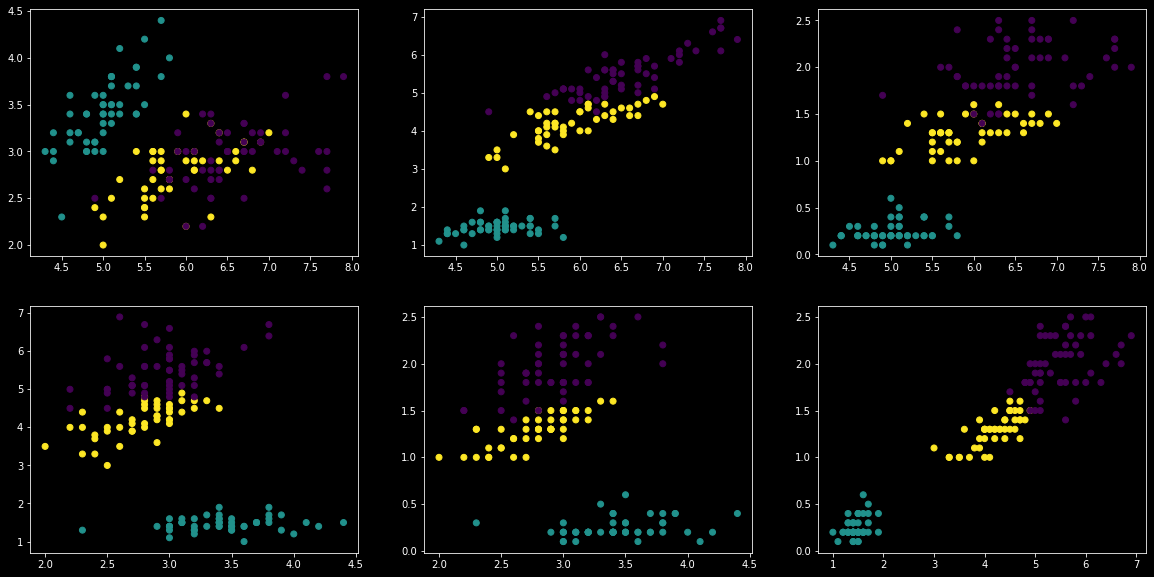

In [183]:
##TODO##
labels = gmm.predict(X)
fig, ax= plt.subplots(2,3, figsize=(20, 10))
ax[0][0].scatter(X[:, 0], X[:, 1],c = labels)
ax[0][1].scatter(X[:, 0], X[:, 2],c = labels)
ax[0][2].scatter(X[:, 0], X[:, 3],c = labels)
ax[1][0].scatter(X[:, 1], X[:, 2],c = labels)
ax[1][1].scatter(X[:, 1], X[:, 3],c = labels)
ax[1][2].scatter(X[:, 2], X[:, 3],c = labels)
plt.show()
    
